In [9]:
import numpy as np
from scipy.optimize import minimize
from autograd import value_and_grad

# Slutprut Eksamen

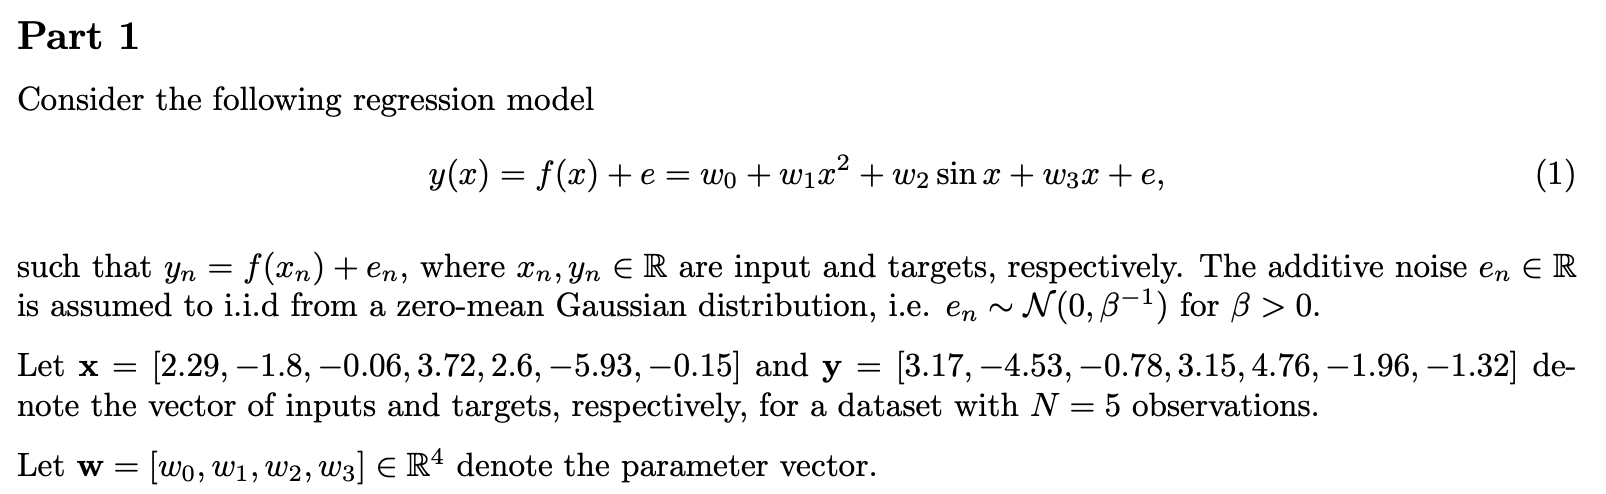

In [29]:
## Question 1.1: Compute and report a maximum likelihood estimate for w and β.
# Data
x = np.array([2.29, -1.8, -0.06, 3.72, 2.6, -5.93, -0.15])
y = np.array([3.17, -4.53, -0.78, 3.15, 4.76, -1.96, -1.32])
# w = [w0, w1, w2, w3]
N = 7

# we define our dataset based on the data
# f = w0 + w1*x**2 + w2*sin(x) + w3*x + e
# where e ~ N(0, beta**-1)

log_npdf = lambda x, m, v: -0.5*np.log(2*np.pi*v) -0.5*(x-m)**2/v # log normal pdf

Phi_train = np.zeros((N, 4))
Phi_train[:, 0] = 1 # bias
Phi_train[:, 1] = x**2 # x^2
Phi_train[:, 2] = np.sin(x) # sin(x)
Phi_train[:, 3] = x # x

# We find the MLE for w and beta by maximizing the log likelihood
w_MLE = np.linalg.solve(Phi_train.T@Phi_train, Phi_train.T@y).ravel()

# Estimate beta (Noise Precision) by using Bishop (3.21)
# Predictions
y_pred = Phi_train @ w_MLE

# Residual sum of squares (RSS)
rss = np.sum((y - y_pred) ** 2)

# Estimating sigma^2 and beta
sigma_squared = rss / N
beta_MLE = 1 / sigma_squared

print(f"MLE for w: {w_MLE}")
print(f"MLE for beta: {beta_MLE}")

MLE for w: [-0.73483423  0.11247988  2.35754774  1.01247728]
MLE for beta: 4.841267709063771


In [ ]:
## Question 1.2: Compute the posterior predictive distribution p(y∗|y, x∗ = 1), where y∗ = y(x∗)
# using a plug-in approximation based on the maximum likelihood estimators for w and β.
# Report the mean, standard deviation and a 95% credibility interval for y∗

In [32]:
# Plugin approximation is simply using the MLE for w and beta that we just found
x_star = 1
Phi_star = np.array([1, x_star**2, np.sin(x_star), x_star])

# Posterior predictive distribution
mean_star = Phi_star @ w_MLE
print(f"Mean of y*: {mean_star}")
print(f"Standard deviation of y*: {np.sqrt(1/beta_MLE)}") # from Murphy (4.197)
print(f"95% credibility interval for y*: [{mean_star - 1.96*np.sqrt(1/beta_MLE)}, {mean_star + 1.96*np.sqrt(1/beta_MLE)}]")

Mean of y*: 2.3739309472771275
Standard deviation of y*: 0.4544859382003122
95% credibility interval for y*: [1.4831385084045157, 3.2647233861497393]
